Load the data

In [1]:
df=read.csv("Munich03_SQL.csv")
head(df,5) 

,rent,rentsqm,area,rooms,yearc,bathextra,bathtile,cheating,district,location,upkitchen,wwater
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>
1,741.39,10.90,68,2,1918,0,1,1,Lud-Isar,good,0,1
2,715.82,11.01,65,2,1995,0,1,1,Lud-Isar,good,0,1
3,528.25,8.38,63,3,1918,0,1,1,Lud-Isar,good,0,1
4,553.99,8.52,65,3,1983,1,1,1,Ram-Per,normal,0,1
5,698.21,6.98,100,4,1995,1,1,1,Ram-Per,good,1,1


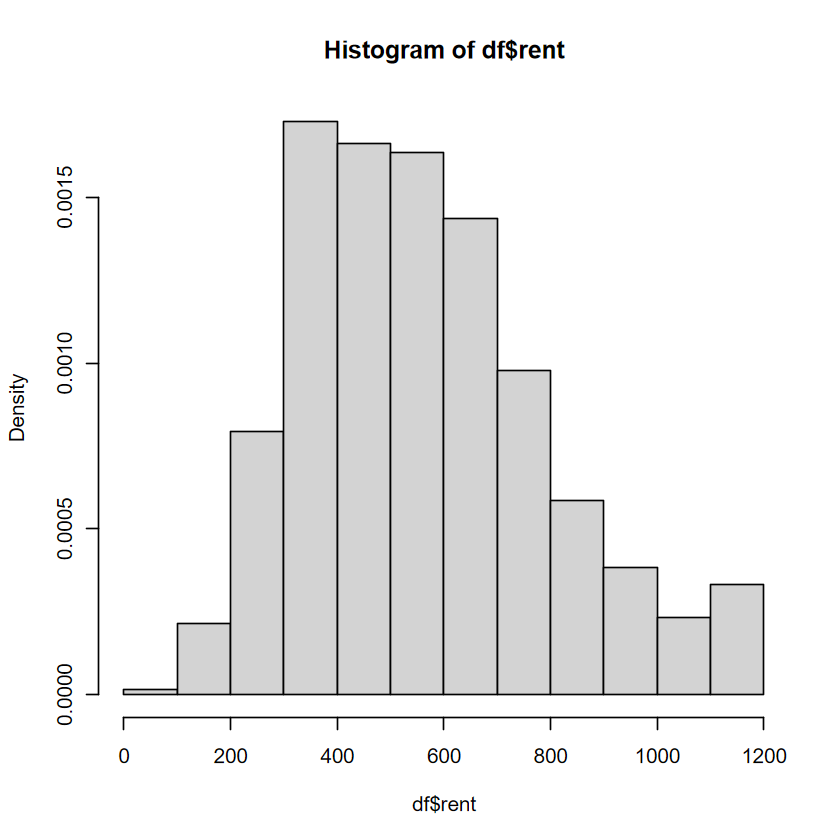

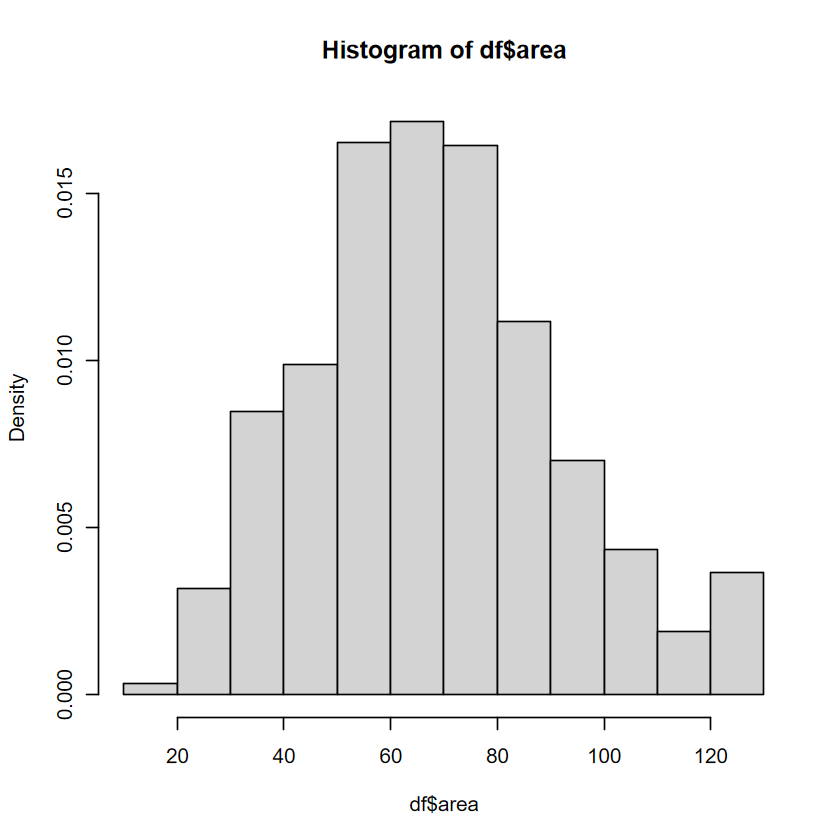

In [16]:
hist(df$rent,freq=F)
hist(df$area,freq=F)

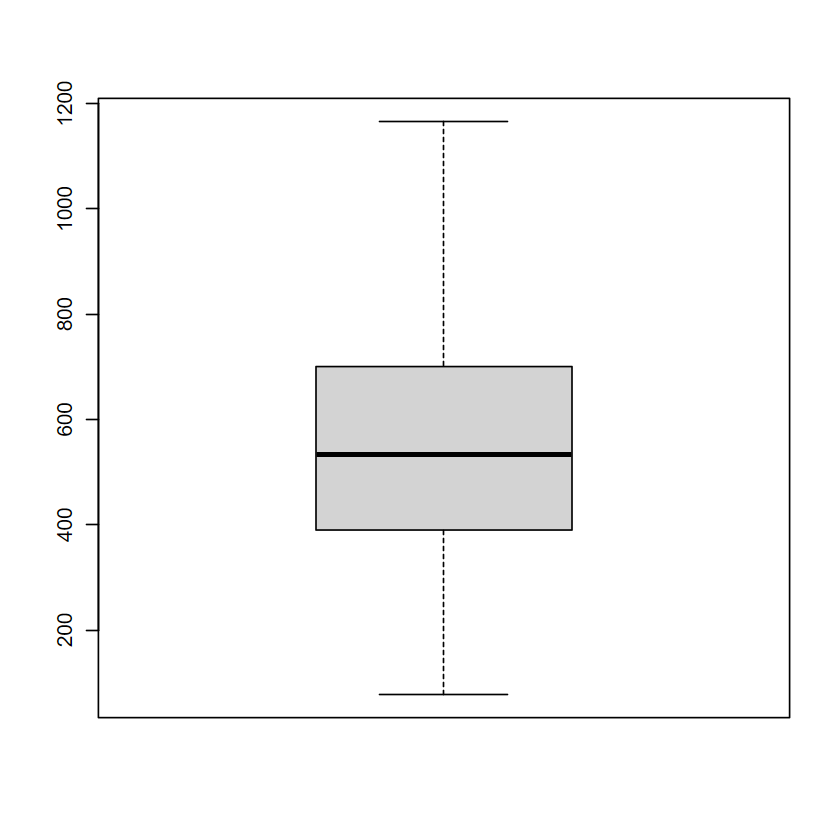

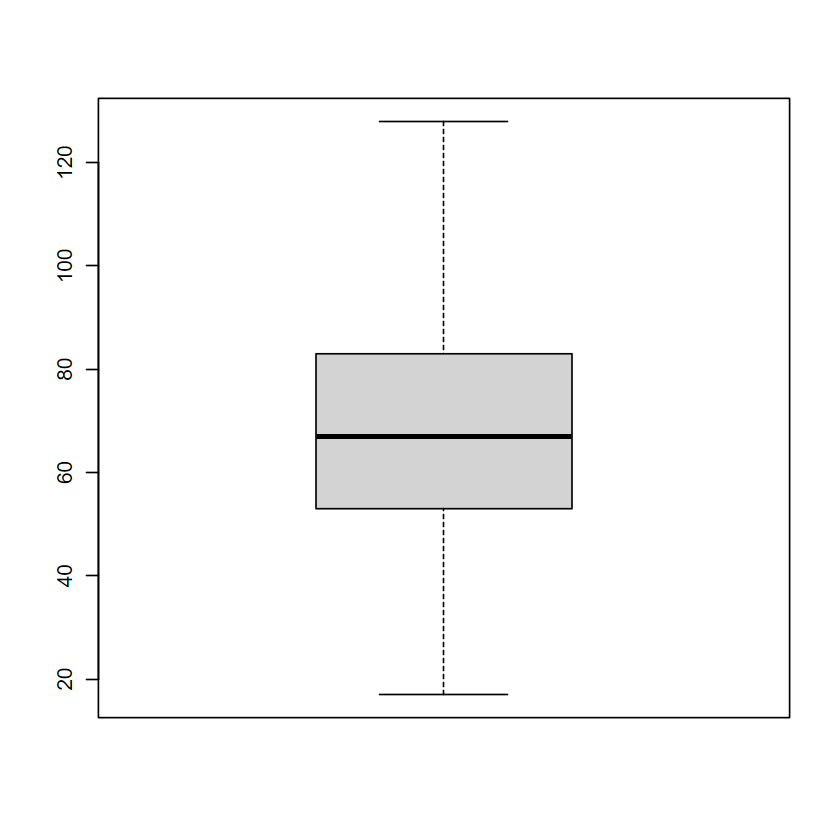

In [12]:
boxplot(df$rent)
boxplot(df$area)

In [17]:
# Chọn 2 cột cụ thể
df_num <- df[ , c("rent", "area")]

# Hàm tính tỷ lệ outlier theo IQR
outlier_ratio <- function(x) {
  x <- x[!is.na(x)]  # loại bỏ NA
  Q1 <- quantile(x, 0.25)
  Q3 <- quantile(x, 0.75)
  IQR <- Q3 - Q1
  lower <- Q1 - 1.5 * IQR
  upper <- Q3 + 1.5 * IQR
  outliers <- sum(x < lower | x > upper)
  ratio <- outliers / length(x)
  return(ratio)
}

# Áp dụng cho 2 cột
ratios <- sapply(df_num, outlier_ratio)

# In kết quả
outlier_summary <- data.frame(
  Variable = names(ratios),
  Outlier_Ratio = round(ratios, 4)*100
)
print(outlier_summary)

     Variable Outlier_Ratio
rent     rent             0
area     area             0


In [9]:
replace_outliers_with_bounds <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1
  lower <- Q1 - 1.5 * IQR
  upper <- Q3 + 1.5 * IQR
  
  x[x < lower] <- lower
  x[x > upper] <- upper
  return(x)
}

In [10]:
df$rent <- replace_outliers_with_bounds(df$rent)
df$area <- replace_outliers_with_bounds(df$area)

In [18]:
#library(readr)
#write_csv(df, "Munich03_cleaned.csv")